In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
from google.colab import  drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
cd '/content/drive/MyDrive/Colab Notebooks/College Codes/Linear Regression'

/content/drive/MyDrive/Colab Notebooks/College Codes/Linear Regression


In [6]:
data = pd.read_csv('student-mat.csv')
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [7]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [31]:
data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [8]:
num_features = [name for name in data.columns if data[name].dtype in ['int64', 'float64']]
cat_features = [name for name in data.columns if data[name].dtype == 'object']

In [9]:
cat_features

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [10]:
for x in cat_features:
  print(x," = ",data[x].unique())

school  =  ['GP' 'MS']
sex  =  ['F' 'M']
address  =  ['U' 'R']
famsize  =  ['GT3' 'LE3']
Pstatus  =  ['A' 'T']
Mjob  =  ['at_home' 'health' 'other' 'services' 'teacher']
Fjob  =  ['teacher' 'other' 'services' 'health' 'at_home']
reason  =  ['course' 'other' 'home' 'reputation']
guardian  =  ['mother' 'father' 'other']
schoolsup  =  ['yes' 'no']
famsup  =  ['no' 'yes']
paid  =  ['no' 'yes']
activities  =  ['no' 'yes']
nursery  =  ['yes' 'no']
higher  =  ['yes' 'no']
internet  =  ['no' 'yes']
romantic  =  ['no' 'yes']


In [11]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in list(cat_features):
    data[i]=le.fit_transform(data[i])

In [12]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,0,1,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,0,0,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,2,1,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,1,1,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,1,0,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10,10


In [13]:
matrix_corr = data.corr()
matrix_corr.G3

school       -0.045017
sex           0.103456
age          -0.161579
address       0.105756
famsize       0.081407
Pstatus      -0.058009
Medu          0.217147
Fedu          0.152457
Mjob          0.102082
Fjob          0.042286
reason        0.121994
guardian     -0.070109
traveltime   -0.117142
studytime     0.097820
failures     -0.360415
schoolsup    -0.082788
famsup       -0.039157
paid          0.101996
activities    0.016100
nursery       0.051568
higher        0.182465
internet      0.098483
romantic     -0.129970
famrel        0.051363
freetime      0.011307
goout        -0.132791
Dalc         -0.054660
Walc         -0.051939
health       -0.061335
absences      0.034247
G1            0.801468
G2            0.904868
G3            1.000000
Name: G3, dtype: float64

In [19]:
x = data.drop('G3',axis=1)
y = data['G3']

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [24]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
weights=reg.coef_
bais=reg.intercept_
print(m,c)

[ 0.4264268   0.19115055 -0.15991559  0.14347342  0.10007279 -0.27955432
  0.22154633 -0.16768186 -0.06814658 -0.04198582  0.04816474 -0.10323747
  0.06201193  0.03895389 -0.15642274  0.60602228  0.10589256  0.1600736
 -0.40860814 -0.19114287 -0.01297468 -0.13620804 -0.32631892  0.16618394
  0.04938934 -0.07171554 -0.19293099  0.22790527  0.09632549  0.05009049
  0.15027248  0.95655577] 0.2004091396643659


In [25]:
from sklearn.metrics import r2_score
y_pred = reg.predict(x_test)
print(r2_score(y_test, y_pred))

0.7884255186284578


In [30]:
from sklearn import metrics
print('MEAN Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MEAN Absolute Error: 1.5137248914220212
Mean Squared Error: 5.989278309108421
Root Mean Squared Error: 2.447300208210758


Text(0, 0.5, 'Predicted Y')

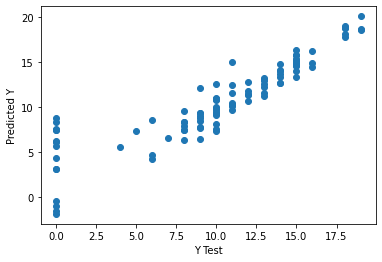

In [29]:
plt.scatter(y_test,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')